In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [3]:
import os
os.getcwd()
os.chdir('/home/piai/바탕화면/유아용품')

In [4]:
df_raw = pd.read_csv('Sales_data.csv')
df_raw

,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,물품대분류,상품명
0,901011864201303,2023-01-06,2023-01-02,2023-01-01,35.0,201901010750089,74560,43825,팬티,하기스 매직핏팬티 5단계 남아 124매(팬티형)
1,901011864430366,2023-01-04,2023-01-02,2023-01-01,9.0,201901010750143,74560,43825,팬티,하기스 매직핏팬티 3단계 남아 184매(팬티형)
2,81231186197954,2023-01-06,2023-01-02,2023-01-01,22.0,201812310749820,53920,36769,팬티,하기스 네이처메이드 팬티 5단계 여아 80매(팬티형)
3,812311863500220,2023-01-04,2023-01-02,2023-01-01,8.0,201812310750007,52160,32408,팬티,하기스 보송보송팬티 4단계 공용 124매(팬티형)
4,812311863220192,2023-01-04,2023-01-02,2023-01-01,23.0,201812310749977,47360,30066,팬티,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형)
...,...,...,...,...,...,...,...,...,...,...
199994,00806233401-26770461124511,2024-08-12,2024-08-09,2024-08-08,13.0,201906180918504,21300,14910,FC,라네이처 시그니처 울트라슬림 날개 중형 12개입 (EA)
199995,00806204436-0461904922687,2024-08-12,2024-08-09,2024-08-08,163.0,201901280776735,7900,5840,FC,라네이처 시그니처 맥시슬림 날개 중형 12개입 (EA)
199996,00806204436-0461904922688,2024-08-13,2024-08-09,2024-08-08,163.0,201901280776735,7100,5240,FC,라네이처 시그니처 울트라슬림 날개 대형 10개입 (EA)
199997,00806215930-05281256126202,2024-08-11,2024-08-09,2024-08-08,5.0,201906200921415,7100,5240,FC,라네이처 시그니처 울트라슬림 날개 소형 14개입 (EA)


In [5]:
df_raw.shape

(199999, 10)

In [6]:
df_raw.columns

Index(['주문번호', '배송완료일', '배송시작일', '구매일', '구매시월령', '고객번호', '구매금액', '결제금액',
       '물품대분류', '상품명'],
      dtype='object')

In [7]:
print(df_raw['물품대분류'].unique())

['팬티' '체험팩' '물티슈' '더블하트' '기저귀' 'SKC' 'FMC' 'FC' '기타' 'SrC']


In [8]:
print(df_raw['상품명'].unique())

['하기스 매직핏팬티 5단계 남아 124매(팬티형)' '하기스 매직핏팬티 3단계 남아 184매(팬티형)'
 '하기스 네이처메이드 팬티 5단계 여아 80매(팬티형)' ... '[산골간식]한우장조림 3봉'
 '[데르뜨] 젤리 복숭아 90g 24개' '[뉴오리진] 이너플로라 미니 여성 청결제 페미닌 파우더 워시']


In [9]:
df_raw.isnull().sum()

주문번호         0
배송완료일        0
배송시작일        0
구매일          0
구매시월령    31857
고객번호         0
구매금액         0
결제금액         0
물품대분류        0
상품명          0
dtype: int64

In [10]:
print(df_raw.dtypes)

주문번호      object
배송완료일     object
배송시작일     object
구매일       object
구매시월령    float64
고객번호      object
구매금액       int64
결제금액       int64
물품대분류     object
상품명       object
dtype: object


In [11]:
df_raw.describe()

,구매시월령,구매금액,결제금액
count,168142.000000,199999.000000,199999.000000
mean,14.845458,30572.028160,21713.797759
std,38.521315,30560.954766,21341.455664
min,-10.000000,0.000000,-35166.000000
25%,2.000000,7400.000000,5998.000000
50%,6.000000,17500.000000,12621.000000
75%,13.000000,51200.000000,34799.000000
max,1439.000000,598000.000000,539000.000000


In [12]:
# 각 변수의 고유한 값 개수 및 샘플 확인
# 한번씩 그냥 확인해보기 잘못된 샘플이 없는지

unique_values_summary = {
    "변수명": [],
    "고유값 개수": [],
    "샘플 값": []
}

for col in df_raw.columns:
    unique_values_summary["변수명"].append(col)
    unique_values_summary["고유값 개수"].append(len(df_raw[col].unique()))
    unique_values_summary["샘플 값"].append(df_raw[col].unique()[:5])  # 처음 5개 샘플 값

# 데이터프레임으로 변환
unique_values_df = pd.DataFrame(unique_values_summary)
unique_values_df

,변수명,고유값 개수,샘플 값
0,주문번호,186068,"[901011864201303, 901011864430366, 81231186197..."
1,배송완료일,588,"[2023-01-06, 2023-01-04, 2023-01-05, 2023-01-0..."
2,배송시작일,581,"[2023-01-02, 2023-01-03, 2023-01-04, 2023-01-0..."
3,구매일,581,"[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0..."
4,구매시월령,485,"[35.0, 9.0, 22.0, 8.0, 23.0]"
5,고객번호,97747,"[201901010750089, 201901010750143, 20181231074..."
6,구매금액,1214,"[74560, 53920, 52160, 47360, 27920]"
7,결제금액,11575,"[43825, 36769, 32408, 30066, 19900]"
8,물품대분류,10,"[팬티, 체험팩, 물티슈, 더블하트, 기저귀]"
9,상품명,2975,"[하기스 매직핏팬티 5단계 남아 124매(팬티형), 하기스 매직핏팬티 3단계 남아 ..."


In [13]:
# 199999 - 186068 = 13931

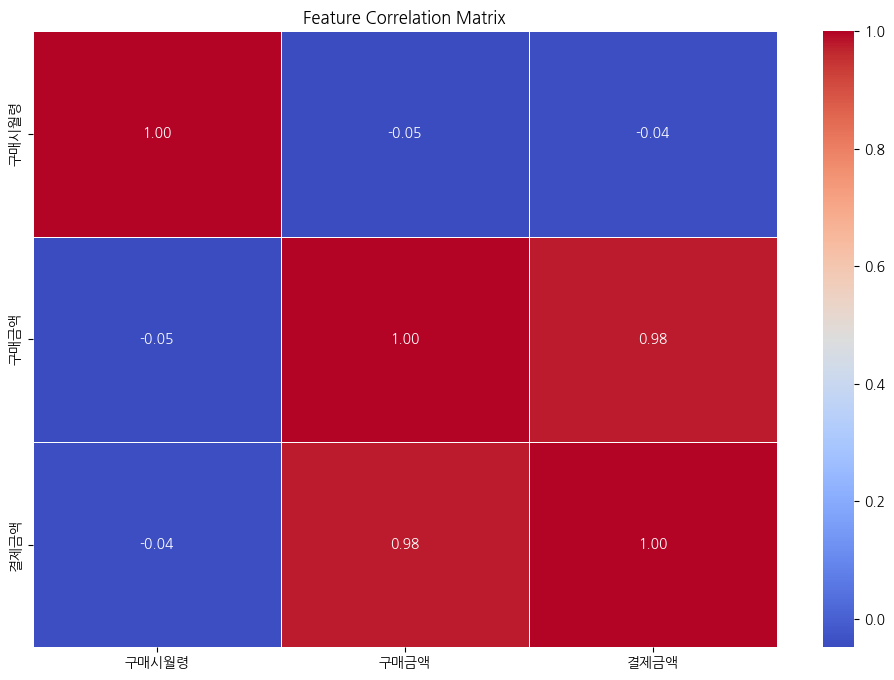

In [14]:
# 주요 변수들 간의 상관관계 분석
correlation_matrix = df_raw.corr()

# 상관 행렬 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

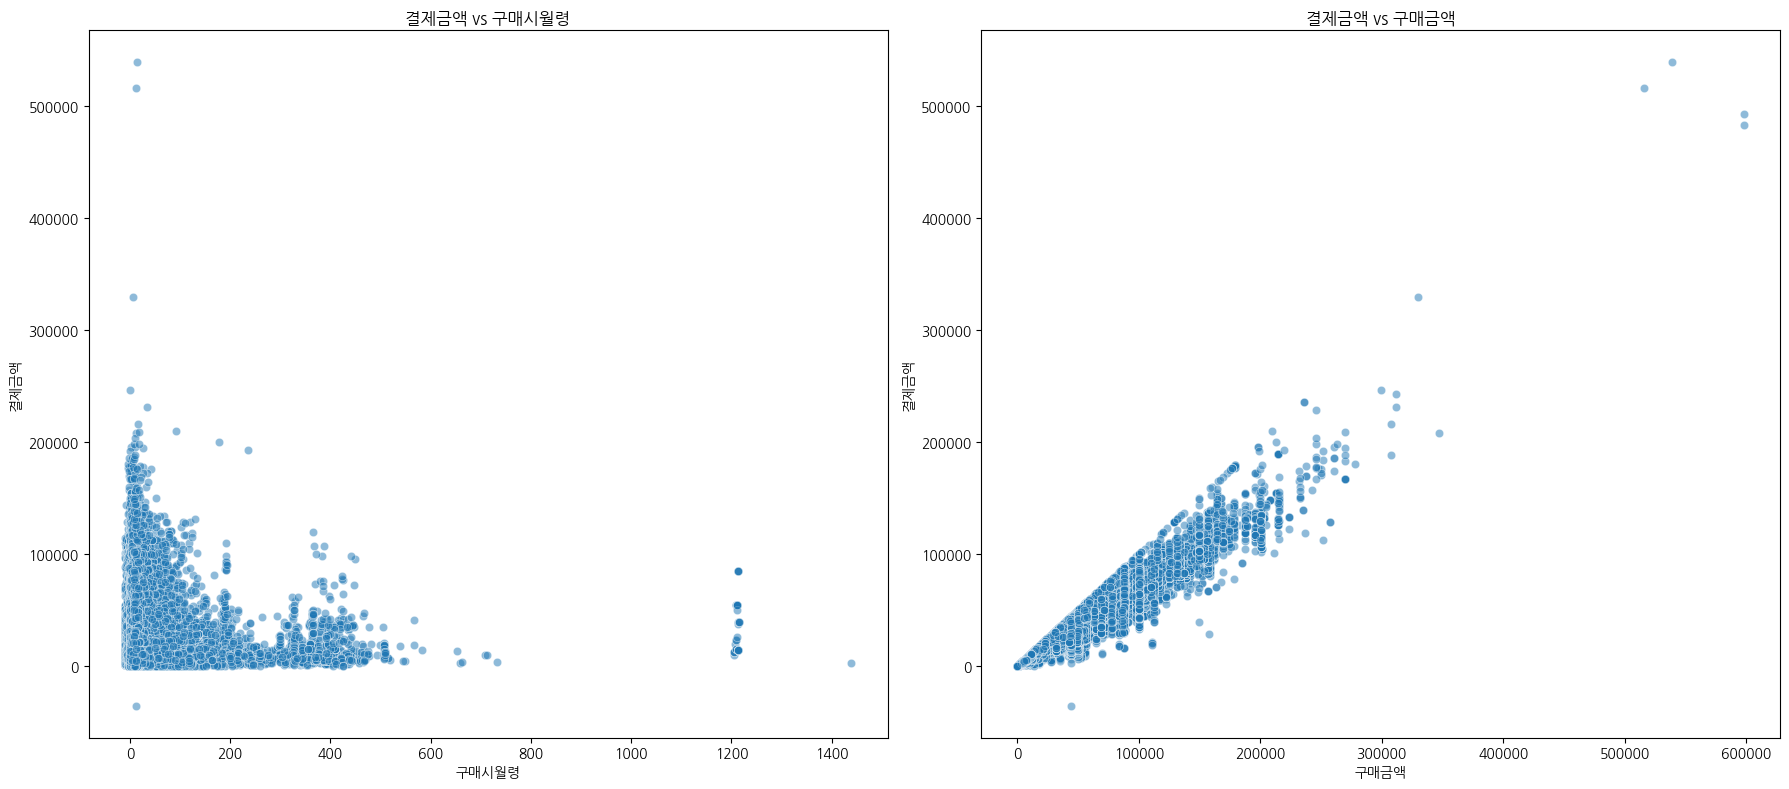

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연속형 변수들의 산점도 시각화
columns_to_plot = ['구매시월령', '구매금액']
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

for i, col in enumerate(columns_to_plot):
    sns.scatterplot(x=df_raw[col], y=df_raw['결제금액'], alpha=0.5, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("결제금액")
    axes[i].set_title(f'결제금액 vs {col}')

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': '구매시월령'}>,
        <Axes: title={'center': '구매금액'}>],
       [<Axes: title={'center': '결제금액'}>,
        <Axes: title={'center': '할인금액'}>],
       [<Axes: title={'center': '할인율'}>,
        <Axes: title={'center': '결제/구매 비율'}>]], dtype=object)

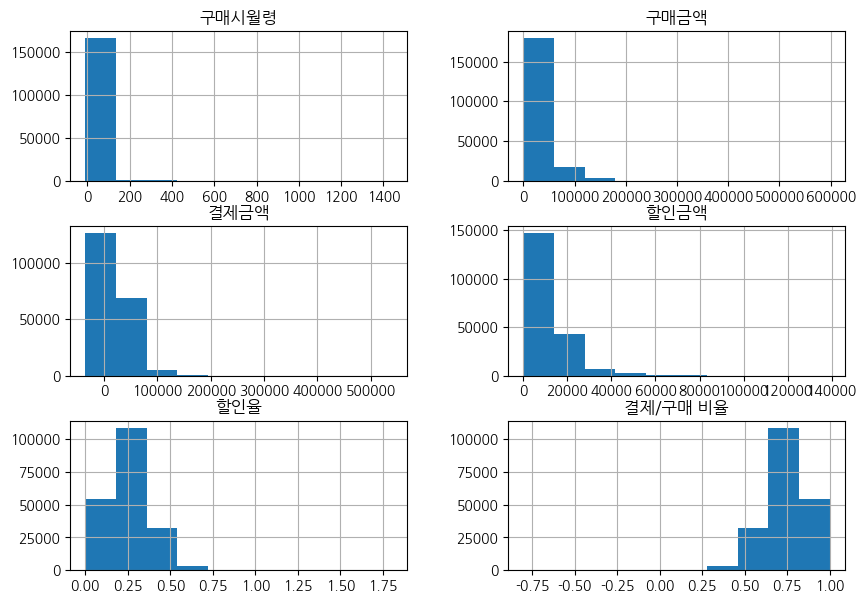

In [33]:
# hist(figsiz) : figsize = (x축 크기, y축 크기)-그래프 영역별 중첩 처리
df_raw.hist(figsize = (10,7))

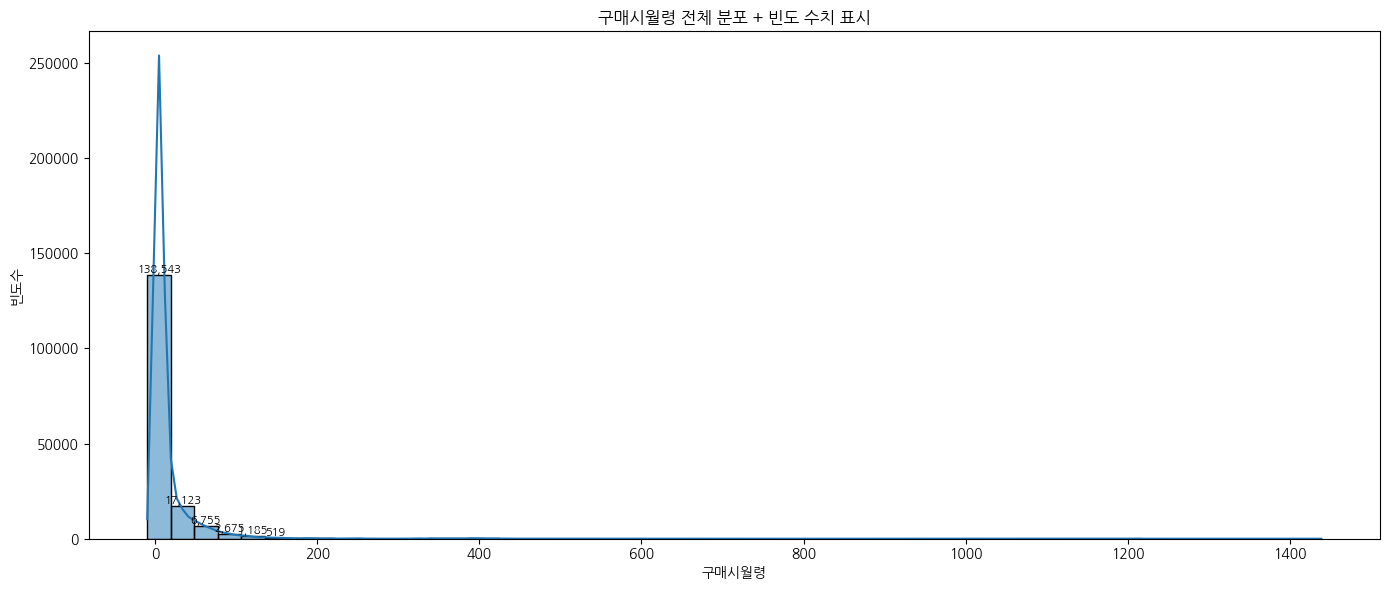

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
hist = sns.histplot(data=df_raw, x="구매시월령", kde=True, bins=50)

# 막대 위에 개수 표시 (빈도수가 너무 작은 경우는 제외)
for p in hist.patches:
    height = p.get_height()
    if height > 500:  # 500 이상인 경우만 수치 표시
        plt.text(p.get_x() + p.get_width() / 2,
                 height,
                 f'{int(height):,}',  # 쉼표 포함 숫자
                 ha='center', va='bottom', fontsize=8)

plt.title("구매시월령 전체 분포 + 빈도 수치 표시")
plt.xlabel("구매시월령")
plt.ylabel("빈도수")
plt.tight_layout()
plt.show()

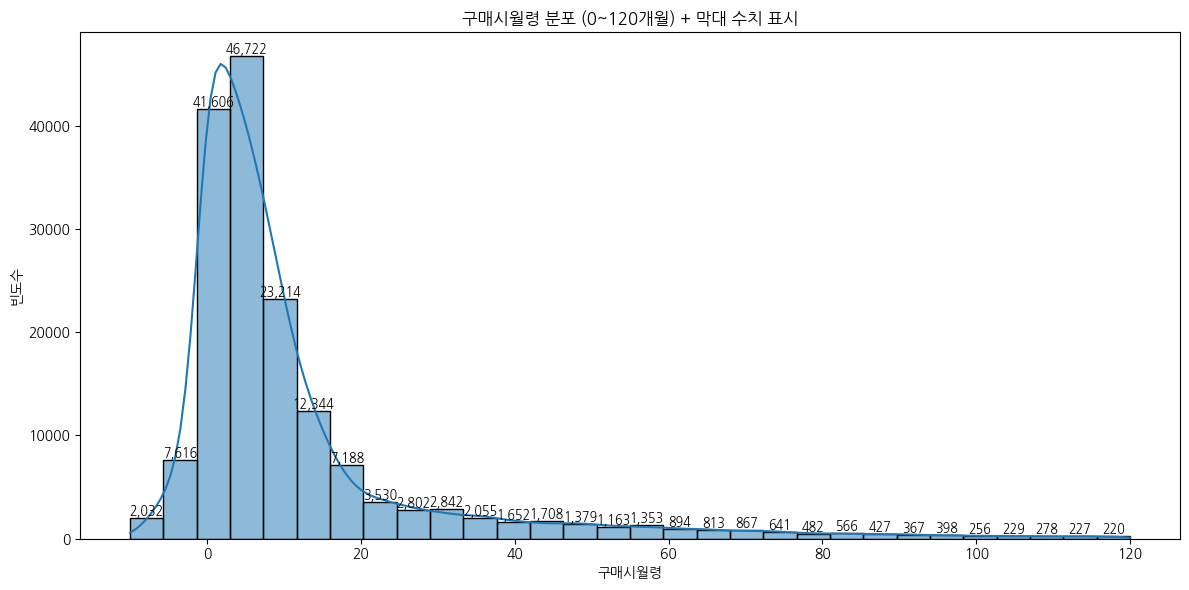

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화용 데이터 (범위 제한)
df_plot = df_raw[df_raw["구매시월령"] <= 120]

plt.figure(figsize=(12, 6))
hist = sns.histplot(data=df_plot, x="구매시월령", kde=True, bins=30)

# 막대 위에 개수 표시
for p in hist.patches:
    height = p.get_height()
    if height > 0:  # 0 이상인 경우만 표시
        plt.text(p.get_x() + p.get_width() / 2,
                 height,
                 f'{int(height):,}',  # 쉼표 넣은 정수 포맷
                 ha='center', va='bottom', fontsize=9)

plt.title("구매시월령 분포 (0~120개월) + 막대 수치 표시")
plt.xlabel("구매시월령")
plt.ylabel("빈도수")
plt.tight_layout()
plt.show()


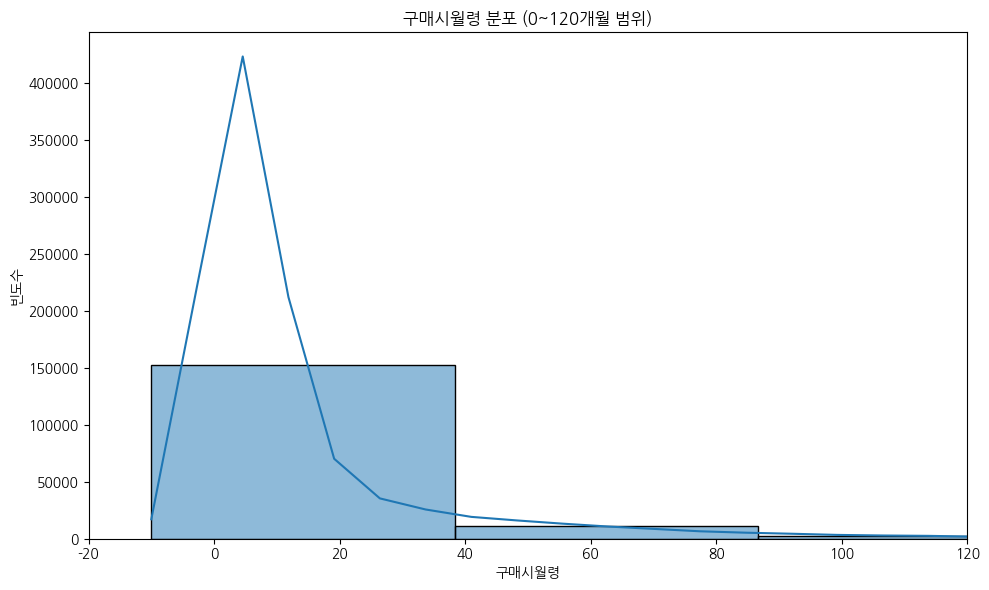

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_raw, x="구매시월령", kde=True, bins=30)
plt.xlim(-20, 120)  # 0~120개월 (10세)로 제한
plt.title("구매시월령 분포 (0~120개월 범위)")
plt.xlabel("구매시월령")
plt.ylabel("빈도수")
plt.tight_layout()
plt.show()

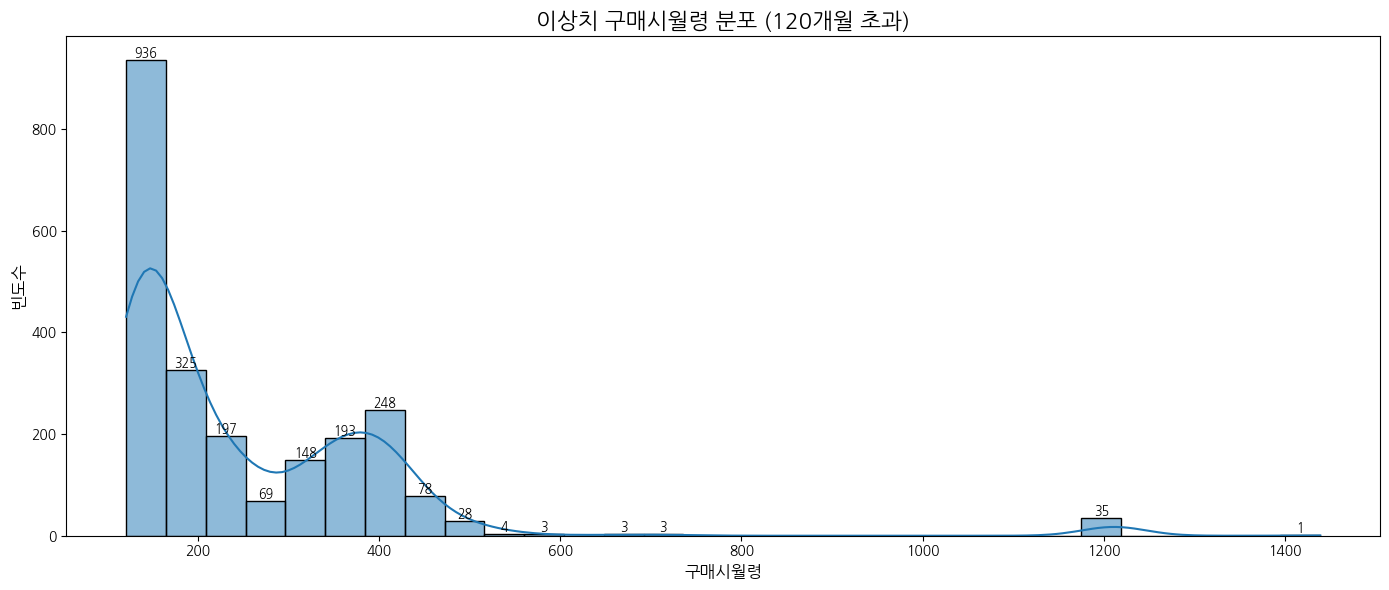

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# 이상치 데이터만 필터링 (120개월 초과)
df_outlier = df_raw[df_raw["구매시월령"] > 120]

plt.figure(figsize=(14, 6))
hist = sns.histplot(data=df_outlier, x="구매시월령", kde=True, bins=30)

# 막대 위에 수치 표시
for p in hist.patches:
    height = p.get_height()
    if height > 0:
        plt.text(p.get_x() + p.get_width() / 2,
                 height,
                 f'{int(height):,}',
                 ha='center', va='bottom', fontsize=9)

plt.title("이상치 구매시월령 분포 (120개월 초과)", fontsize=16)
plt.xlabel("구매시월령", fontsize=12)
plt.ylabel("빈도수", fontsize=12)
plt.tight_layout()
plt.show()

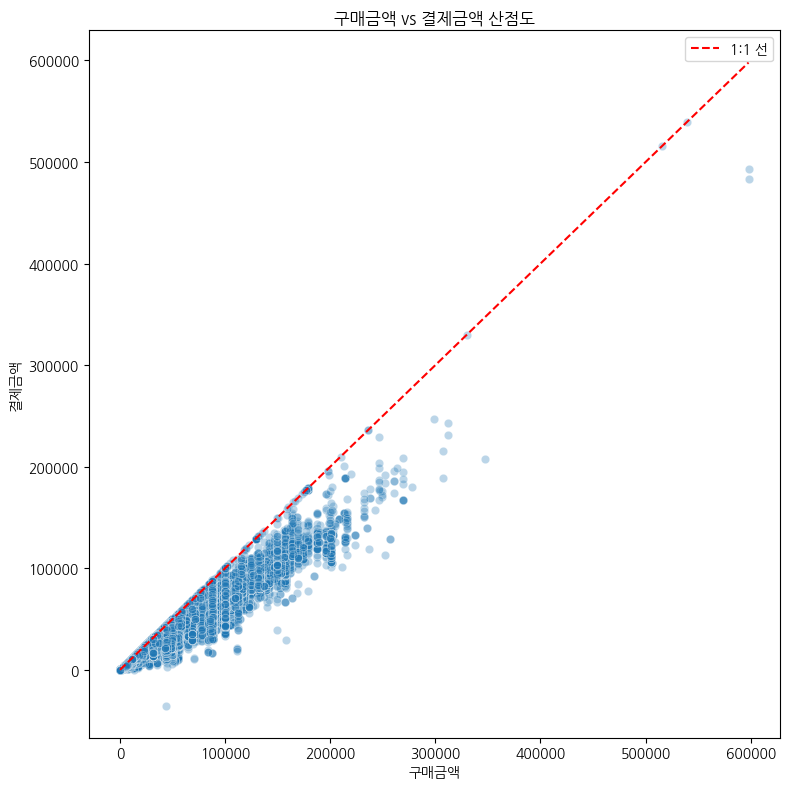

In [38]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_raw, x="구매금액", y="결제금액", alpha=0.3)

plt.plot([0, df_raw["구매금액"].max()],
         [0, df_raw["구매금액"].max()],
         color='red', linestyle='--', label="1:1 선")

plt.title("구매금액 vs 결제금액 산점도")
plt.xlabel("구매금액")
plt.ylabel("결제금액")
plt.legend()
plt.tight_layout()
plt.show()

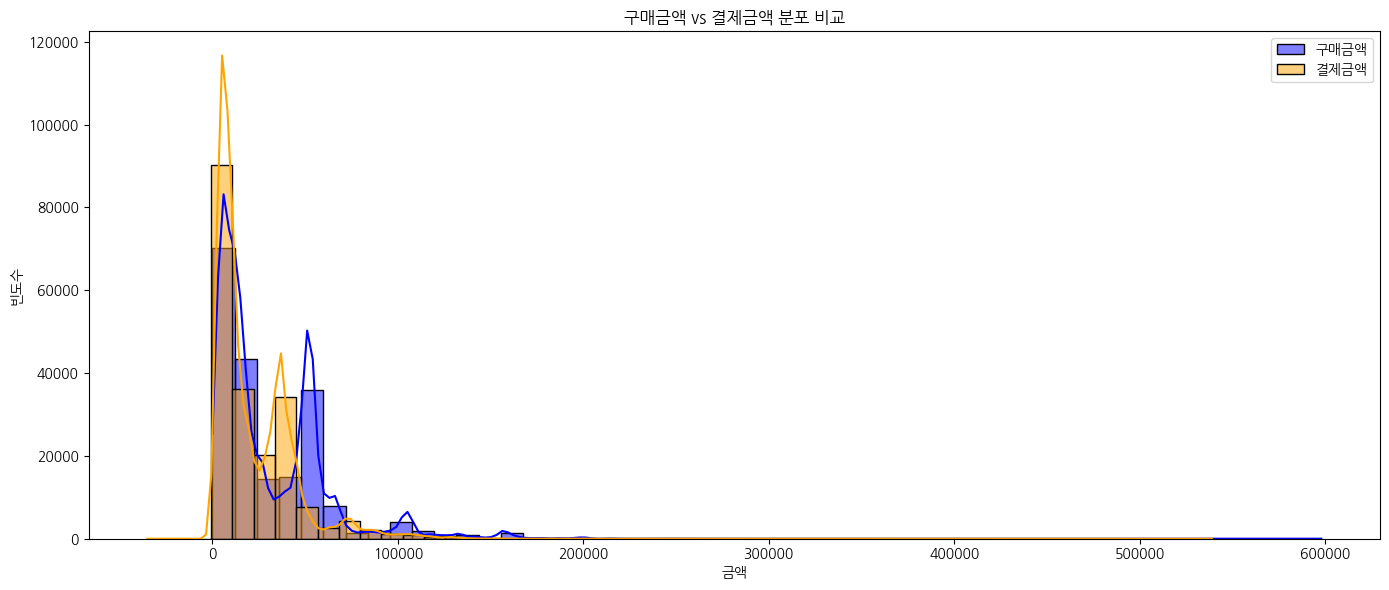

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

sns.histplot(data=df_raw, x="구매금액", color='blue', label='구매금액', kde=True, bins=50, alpha=0.5)
sns.histplot(data=df_raw, x="결제금액", color='orange', label='결제금액', kde=True, bins=50, alpha=0.5)

plt.title("구매금액 vs 결제금액 분포 비교")
plt.xlabel("금액")
plt.ylabel("빈도수")
plt.legend()
plt.tight_layout()
plt.show()

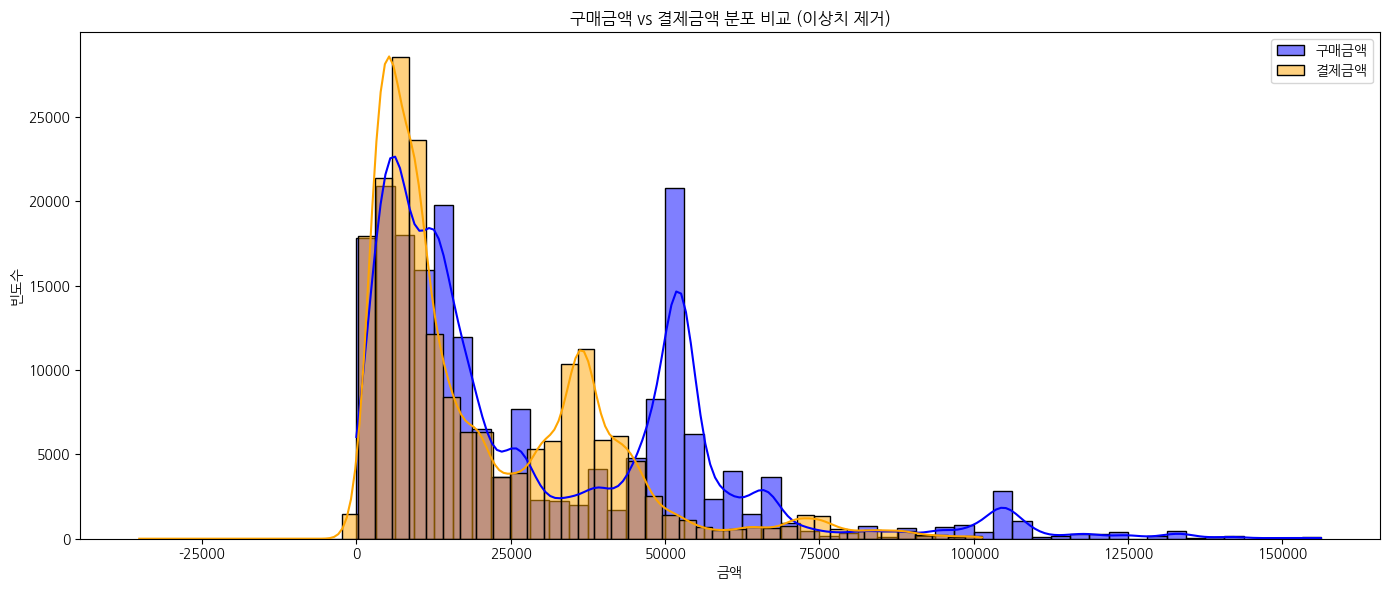

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 구매금액과 결제금액에서 이상치 제거 (상위 1% 컷오프)
q1 = df_raw["구매금액"].quantile(0.99)
q2 = df_raw["결제금액"].quantile(0.99)

df_filtered = df_raw[(df_raw["구매금액"] <= q1) & (df_raw["결제금액"] <= q2)]

# 그래프 그리기
plt.figure(figsize=(14, 6))

sns.histplot(data=df_filtered, x="구매금액", color='blue', label='구매금액', kde=True, bins=50, alpha=0.5)
sns.histplot(data=df_filtered, x="결제금액", color='orange', label='결제금액', kde=True, bins=50, alpha=0.5)

plt.title("구매금액 vs 결제금액 분포 비교 (이상치 제거)")
plt.xlabel("금액")
plt.ylabel("빈도수")
plt.legend()
plt.tight_layout()
plt.show()

📌 1. 구매금액과 결제금액은 유사하지만, 결제금액이 약간 낮다

    두 히스토그램이 대체로 비슷한 범위를 가지지만, 결제금액 쪽 곡선이 조금 왼쪽으로 이동해 있음.

    이는 고객들이 구매금액보다 낮은 금액을 지불했다는 의미.

    👉 할인, 포인트 차감, 쿠폰 사용 등이 있었을 가능성이 높음.

📌 2. 분포의 집중도 확인

    두 분포 모두 특정 금액대(예: 1만~3만 원대 등)에 구매가 집중되어 있다면, 해당 가격대 상품이 주력이라는 의미.

    판매 전략상 이 구간에 핵심 제품군이 형성돼 있다고 해석 가능.

📌 3. 구매금액 대비 결제금액 분포의 왜도(Skewness) 차이

    만약 구매금액 분포가 더 오른쪽으로 긴 꼬리를 가지고 있다면:

        고가 제품이 일부 존재하지만, 실제 결제는 잘 안 되는 구조

        고가 제품은 탐색만 되고 구매 전환은 낮다는 뜻일 수 있음

📌 4. 이상치 제거가 분석에 도움이 됨

    이상치가 포함된 상태에서는 고액 구매 몇 건 때문에 전체 분포가 찌그러졌을 수 있음.

    이상치 제거 후 분포를 보면 실제 사용자 대부분의 구매 패턴이 드러나서,

        고객 세분화

        가격대별 마케팅

        할인 전략 설정 에 더 적합함.

✍️ 보고서용 문장 예시

    "구매금액과 결제금액은 대체로 유사한 분포를 보이지만, 결제금액이 평균적으로 더 낮게 나타났다. 이는 할인이나 포인트 등 프로모션이 적극 활용되었음을 시사한다. 또한 대부분의 구매가 특정 금액대에 집중되어 있으며, 이상치를 제거한 분석을 통해 보다 명확한 가격 전략 수립이 가능하다."


In [41]:
df_raw.shape

(199999, 15)

In [42]:
print(df_raw["구매금액"].isna().sum())
print(f"전체 구매 건수: {len(df_raw)}")

0
전체 구매 건수: 199999


In [43]:
q90 = df_raw["구매금액"].quantile(0.90)
q99 = df_raw["구매금액"].quantile(0.99)

print(f"상위 10% 기준선: {q90:,.0f}원")
print(f"상위 1% 기준선: {q99:,.0f}원")

상위 10% 기준선: 62,400원
상위 1% 기준선: 156,240원


In [44]:
high_value = df_raw[df_raw["구매금액"] >= 150000]
print(f"고가 구매 고객 수: {len(high_value)}명")

mid_value = df_raw[(df_raw["구매금액"] >= 50000) & (df_raw["구매금액"] < 150000)]
print(f"중간 구매 고객 수 (5만~15만원): {len(mid_value):,}명")

low_value = df_raw[(df_raw["구매금액"] >= 20000) & (df_raw["구매금액"] < 50000)]
print(f"중간 구매 고객 수 (2만~5만원): {len(low_value):,}명")

lower_value = df_raw[(df_raw["구매금액"] >= 10000) & (df_raw["구매금액"] < 20000)]
print(f"저저가 구매 고객 수 (1만~2만원): {len(lower_value):,}명")

bottom_value = df_raw[df_raw["구매금액"] < 10000]
print(f"초저가 구매 고객 수: {len(bottom_value)}명")

고가 구매 고객 수: 2083명
중간 구매 고객 수 (5만~15만원): 50,319명
중간 구매 고객 수 (2만~5만원): 38,416명
저저가 구매 고객 수 (1만~2만원): 50,283명
초저가 구매 고객 수: 58898명


In [45]:
print(df_raw["결제금액"].isna().sum())
print(f"전체 결제 건수: {len(df_raw)}")

0
전체 결제 건수: 199999


In [46]:
q90 = df_raw["결제금액"].quantile(0.90)
q99 = df_raw["결제금액"].quantile(0.99)

print(f"상위 10% 기준선: {q90:,.0f}원")
print(f"상위 1% 기준선: {q99:,.0f}원")

상위 10% 기준선: 44,800원
상위 1% 기준선: 101,365원


In [47]:
high_value = df_raw[df_raw["결제금액"] >= 150000]
print(f"고가 결제 고객 수: {len(high_value)}명")

mid_value = df_raw[(df_raw["결제금액"] >= 50000) & (df_raw["결제금액"] < 150000)]
print(f"중간 결제 고객 수 (5만~15만원): {len(mid_value):,}명")

low_value = df_raw[(df_raw["결제금액"] >= 20000) & (df_raw["결제금액"] < 50000)]
print(f"중간 결제 고객 수 (2만~5만원): {len(low_value):,}명")

lower_value = df_raw[(df_raw["결제금액"] >= 10000) & (df_raw["결제금액"] < 20000)]
print(f"저저가 결제 고객 수 (1만~2만원): {len(lower_value):,}명")

bottom_value = df_raw[df_raw["결제금액"] < 10000]
print(f"초저가 결제 고객 수: {len(bottom_value)}명")

고가 결제 고객 수: 116명
중간 결제 고객 수 (5만~15만원): 14,160명
중간 결제 고객 수 (2만~5만원): 63,128명
저저가 결제 고객 수 (1만~2만원): 38,595명
초저가 결제 고객 수: 84000명


In [48]:
df_raw["할인금액"] = df_raw["구매금액"] - df_raw["결제금액"] #할인금액
df_raw["할인율"] = df_raw["할인금액"] / df_raw["구매금액"] #할인율
df_raw["결제/구매 비율"] = df_raw["결제금액"] / df_raw["구매금액"] #마진지표

평균할인율 = df_raw["할인율"].mean()
df_raw["할인민감고객"] = df_raw["할인율"] > 평균할인율

정가로 샀다면 할인율 = 0

반값에 샀다면 할인율 = 0.5

무료로 샀다면 할인율 = 1

할인율이 1 이상이면 말이 안 됨
→ 고객이 오히려 돈을 받았거나, 시스템상 결제금액이 음수로 기록된 거야됨

(EX)
구매금액: 10,000원  
결제금액: -5,000원 → 할인율 = (10,000 - (-5,000)) / 10,000 = 1.5

In [49]:
def 등급구분(row):
    if row["결제금액"] >= 150000:
        return "VIP"
    elif row["결제금액"] >= 50000:
        return "GOLD"
    elif row["결제금액"] >= 20000:
        return "SILVER"
    elif row["결제금액"] >= 10000:
        return "COPPER"
    else:
        return "NORMAL"

df_raw["결제등급"] = df_raw.apply(등급구분, axis=1)

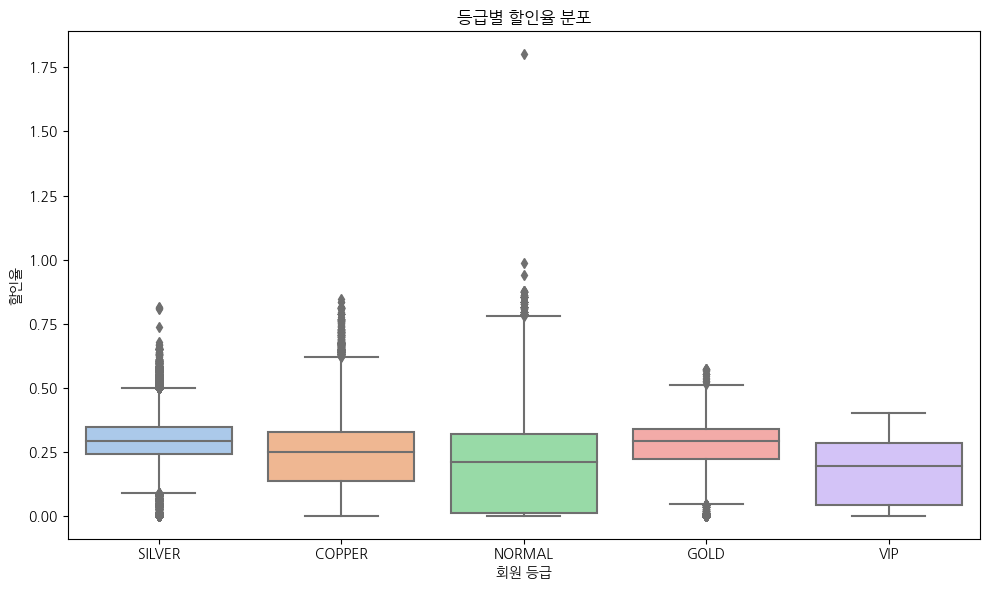

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_raw, x="결제등급", y="할인율", palette="pastel")
plt.title("등급별 할인율 분포")
plt.xlabel("회원 등급")
plt.ylabel("할인율")
plt.tight_layout()
plt.show()

✅ 1. VIP 등급은 할인율이 가장 낮다

    박스 위치가 전체적으로 아래쪽에 있고, 중앙값(굵은 선)도 낮음

    👉 고액을 결제한 VIP 고객들은 할인을 거의 받지 않았다

    정가 구매 비율이 높고 수익성이 높은 고객층일 가능성이 큼

    💡 인사이트: VIP는 가격에 덜 민감한 고객 → 충성도 높을 가능성

✅ 2. SILVER, GOLD 등급이 오히려 할인율이 높다

    중간 등급(SILVER, GOLD)은 평균 할인율이 0.2~0.3대

    박스 높이가 큼 → 할인율의 편차도 큼

    💡 인사이트: 중간 결제 고객은 할인에 민감하게 반응하는 고객군
    → 쿠폰 마케팅 대상자로 적합할 수 있음

✅ 3. NORMAL 등급(초저가 고객)은 할인율이 매우 다양

    아웃라이어(이상치)가 굉장히 많고, 일부는 할인율 1 이상도 존재

    이는 잘못된 결제 정보(포인트 전액 결제, 시스템 오류)일 가능성도 있음

    ⚠️ 데이터 정합성 확인 필요

✅ 4. 전체적으로 결제금액이 클수록 할인율이 낮은 경향

    GOLD > SILVER > COPPER > VIP 순으로 할인율 중앙값이 낮아지는 형태

    고객 등급이 높을수록 할인율이 낮아지는 경향

    💡 인사이트: 높은 금액을 결제하는 고객은 할인에 의존하지 않는다 → 프리미엄 제품 집중 마케팅 가능

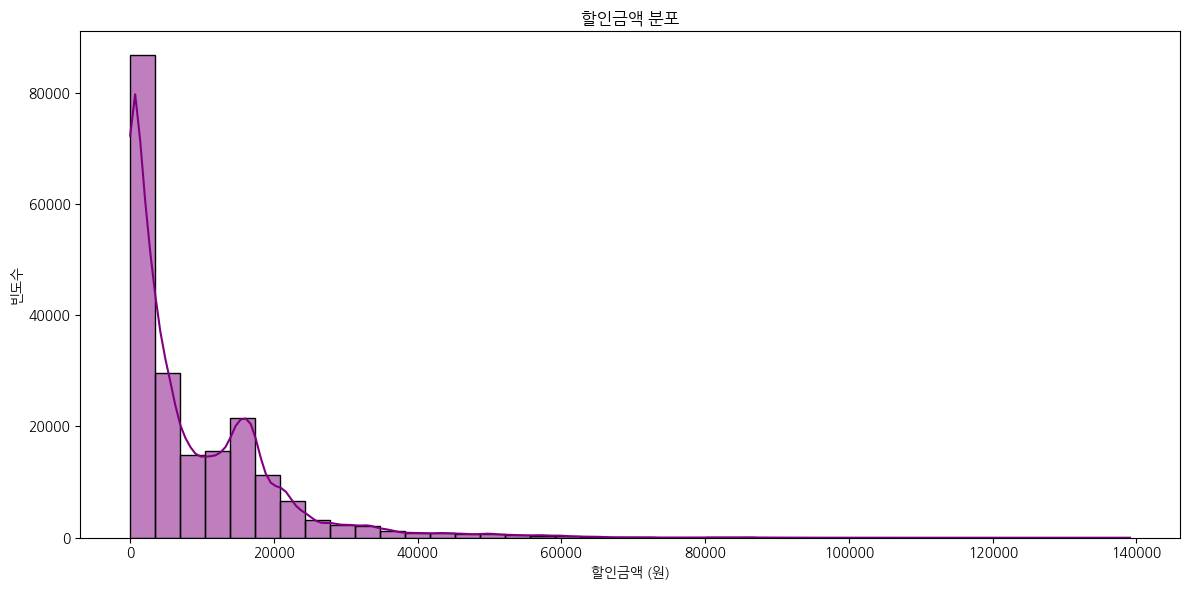

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df_raw["할인금액"], bins=40, kde=True, color="purple")
plt.title("할인금액 분포")
plt.xlabel("할인금액 (원)")
plt.ylabel("빈도수")
plt.tight_layout()
plt.show()

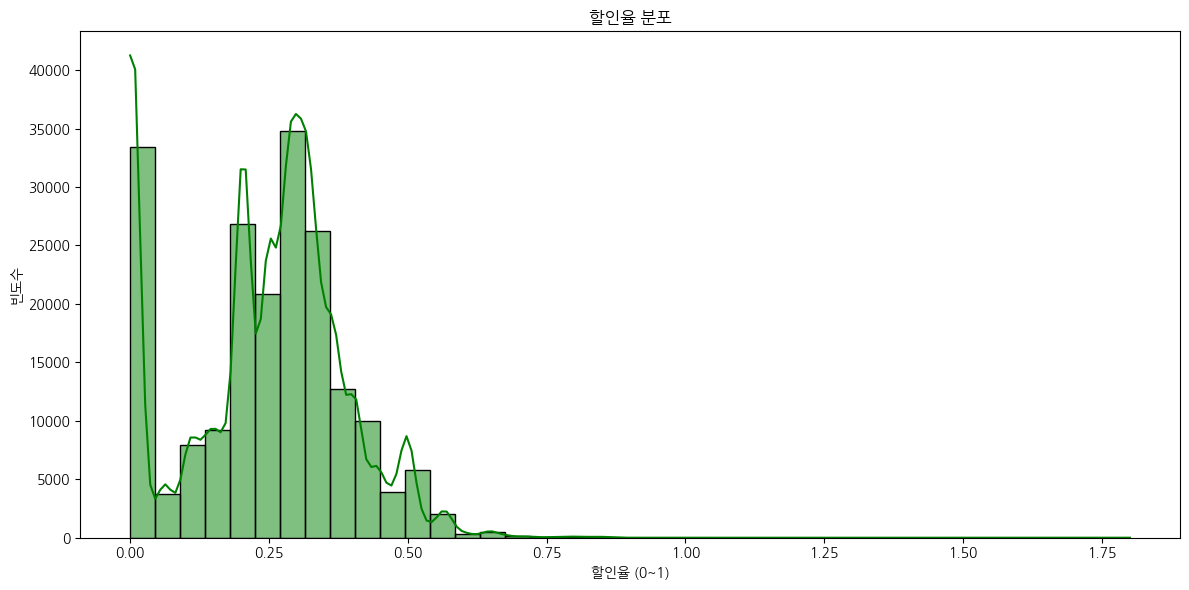

In [52]:
plt.figure(figsize=(12, 6))
sns.histplot(df_raw["할인율"], bins=40, kde=True, color="green")
plt.title("할인율 분포")
plt.xlabel("할인율 (0~1)")
plt.ylabel("빈도수")
plt.tight_layout()
plt.show()

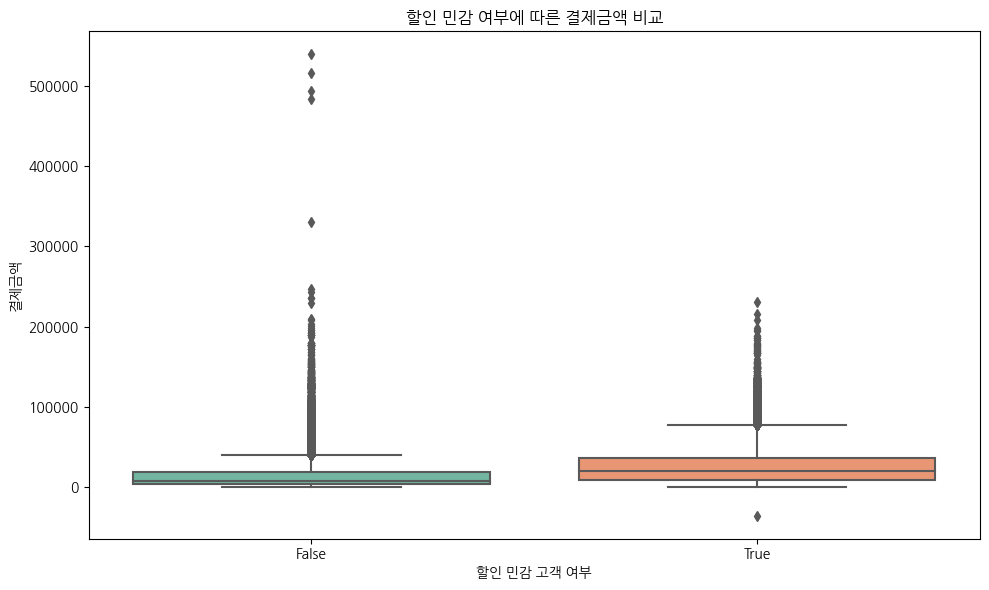

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_raw, x="할인민감고객", y="결제금액", palette="Set2")
plt.title("할인 민감 여부에 따른 결제금액 비교")
plt.xlabel("할인 민감 고객 여부")
plt.ylabel("결제금액")
plt.tight_layout()
plt.show()

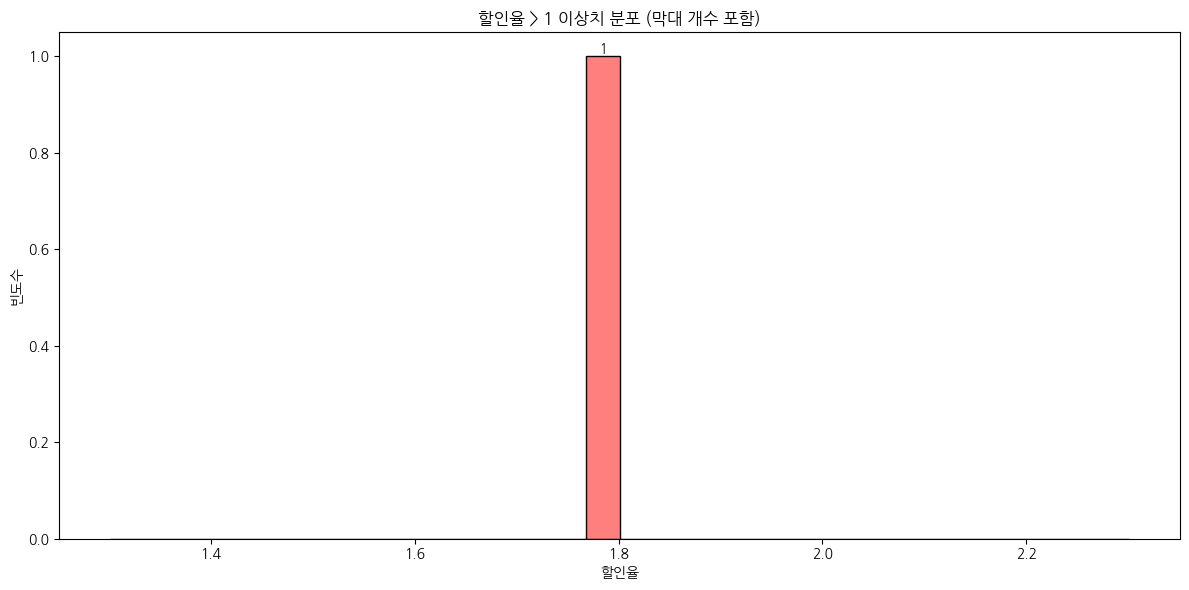

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# 할인율 > 1인 이상치만 필터링
outlier_discount = df_raw[df_raw["할인율"] > 1]

plt.figure(figsize=(12, 6))
hist = sns.histplot(outlier_discount["할인율"], bins=30, kde=True, color="red")

# 막대 위에 개수 표시
for p in hist.patches:
    height = p.get_height()
    if height > 0:
        plt.text(p.get_x() + p.get_width() / 2,
                 height,
                 f'{int(height):,}',
                 ha='center', va='bottom', fontsize=9)

plt.title("할인율 > 1 이상치 분포 (막대 개수 포함)")
plt.xlabel("할인율")
plt.ylabel("빈도수")
plt.tight_layout()
plt.show()


In [56]:
# 이상치가 제거됐는지 확인
outliers = df_raw[df_raw["할인율"] > 1]

# 결과 출력
print(f"할인율 > 1인 이상치 개수: {len(outliers)}건")

할인율 > 1인 이상치 개수: 1건


In [57]:
df_raw[df_raw["할인율"] > 1]

,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,물품대분류,상품명,할인금액,할인율,결제/구매 비율,할인민감고객,결제등급
191001,00630134701-7203783887633,2024-07-05,2024-07-02,2024-07-01,12.0,201904040860910,43900,-35166,팬티,2020 하기스 매직팬티 컴포트 썸머 4단계 공용 96매(팬티형),79066,1.801048,-0.801048,True,NORMAL


결제금액이 마이너스라는 건, 고객이 돈을 지불한 게 아니라 받은 것이란 뜻

실제로는 고객이 43,900원짜리 물건을 사고, 오히려 35,166원을 환급받았다는 의미

결과적으로 고객은 공짜로 받고 돈까지 받아간 셈

✅ 1. 시스템 오류

    결제 처리 과정에서 금액 부호가 반대로 입력된 경우
    👉 원래는 적립금 사용 or 환불, 그런데 잘못 기록됨

✅ 2. 포인트/쿠폰+현금 환불이 동시에 처리됨

    예: 포인트로 결제 → 시스템이 결제금액을 음수로 반영 (오류)

✅ 3. 테스트 계정

    운영자가 일부러 이상한 금액을 입력해서 테스트했을 수도 있음

In [65]:
df_raw[df_raw["결제금액"] < 0]

,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,물품대분류,상품명,할인금액,할인율,결제/구매 비율,할인민감고객,결제등급
191001,00630134701-7203783887633,2024-07-05,2024-07-02,2024-07-01,12.0,201904040860910,43900,-35166,팬티,2020 하기스 매직팬티 컴포트 썸머 4단계 공용 96매(팬티형),79066,1.801048,-0.801048,True,NORMAL


In [83]:
# 할인율 1 이상 제거
df_clean = df_raw[df_raw["할인율"] <= 1]

In [84]:
# 결제금액이 0보다 작거나, 구매금액이 0 이하인 행 제거
df_clean = df_raw[(df_raw["결제금액"] >= 0) & (df_raw["구매금액"] > 0)]

In [85]:
# 이상치가 제거됐는지 확인
outliers = df_raw[df_raw["할인율"] > 1]

# 결과 출력
print(f"할인율 > 1인 이상치 개수: {len(outliers)}건")

할인율 > 1인 이상치 개수: 1건


In [86]:
df_clean.shape

(198516, 15)

In [87]:
# 이상치로 제거된 데이터 수 확인
len_removed = len(df_raw) - len(df_clean)
print(f"제거된 행 수: {len_removed:,}건")

# 그 중 할인율 NaN 개수
nan_count = df_raw["할인율"].isna().sum()
print(f"할인율 NaN 수: {nan_count:,}건")

# 그 중 할인율 > 1인 개수
above_1_count = (df_raw["할인율"] > 1).sum()
print(f"할인율 > 1 수: {above_1_count:,}건")

# 그 외 제거된 건 무엇인지
other_excluded = len_removed - nan_count - above_1_count
print(f"그 외 제거된 건수 (의심): {other_excluded:,}건")

제거된 행 수: 1,483건
할인율 NaN 수: 1,482건
할인율 > 1 수: 1건
그 외 제거된 건수 (의심): 0건


In [89]:
df_raw.isnull().sum()

주문번호            0
배송완료일           0
배송시작일           0
구매일             0
구매시월령       31857
고객번호            0
구매금액            0
결제금액            0
물품대분류           0
상품명             0
할인금액            0
할인율          1482
결제/구매 비율     1482
할인민감고객          0
결제등급            0
dtype: int64

In [90]:
df_clean.isnull().sum()

주문번호            0
배송완료일           0
배송시작일           0
구매일             0
구매시월령       31748
고객번호            0
구매금액            0
결제금액            0
물품대분류           0
상품명             0
할인금액            0
할인율             0
결제/구매 비율        0
할인민감고객          0
결제등급            0
dtype: int64

In [91]:
# 할인율이 NaN이고, 동시에 구매시월령도 NaN인 행
cond = df_raw["할인율"].isna() & df_raw["구매시월령"].isna()
print(f"할인율과 구매시월령이 동시에 결측인 행 수: {cond.sum()}")

할인율과 구매시월령이 동시에 결측인 행 수: 109


df_raw["할인율"] <= 1
이 조건은 할인율이 NaN이면 False로 처리돼서 해당 행이 제외됨.

구매시월령 결측치가 줄었을까?
👉 할인율이 NaN이었던 행 중에, 구매시월령도 NaN인 행이 포함돼 있었음

즉, 조건 필터링을 통해 전체에서 1,483건이 제거됐는데,
그 중 109건이 구매시월령도 결측이었기 때문에 자연스럽게 사라진 것.

(구매금액이 0이거나 결제금액만 있고 구매금액이 누락된 경우, NaN이 됨)

df_raw["할인율_결측여부"] = df_raw["할인율"].isna() : 보존할 경우

In [96]:
# 할인율이 NaN인 행 수
nan_discount = df_raw["할인율"].isna().sum()
print(f"할인율이 NaN인 행 수: {nan_discount:,}건")

nan_gumae = df_raw[df_raw["할인율"].isna() & df_raw["구매금액"].isna()]
print(f"할인율이 NaN이고 구매금액도 NaN인 행 수: {len(nan_gumae):,}건")

nan_gyeolje = df_raw[df_raw["할인율"].isna() & df_raw["결제금액"].isna()]
print(f"할인율이 NaN이고 결제금액도 NaN인 행 수: {len(nan_gyeolje):,}건")

nan_discount_only = df_raw[
    df_raw["할인율"].isna() &
    df_raw["구매금액"].notna() &
    df_raw["결제금액"].notna()
]

print(f"할인율이 NaN인데 구매금액/결제금액은 모두 존재하는 행 수: {len(nan_discount_only):,}건")

summary = {
    "할인율 NaN 전체": df_raw["할인율"].isna().sum(),
    "구매금액 NaN": nan_gumae.shape[0],
    "결제금액 NaN": nan_gyeolje.shape[0],
    "둘 다 NaN 아님": nan_discount_only.shape[0]
}

for key, val in summary.items():
    print(f"{key}: {val:,}건")


할인율이 NaN인 행 수: 1,482건
할인율이 NaN이고 구매금액도 NaN인 행 수: 0건
할인율이 NaN이고 결제금액도 NaN인 행 수: 0건
할인율이 NaN인데 구매금액/결제금액은 모두 존재하는 행 수: 1,482건
할인율 NaN 전체: 1,482건
구매금액 NaN: 0건
결제금액 NaN: 0건
둘 다 NaN 아님: 1,482건


In [101]:
# 할인율이 NaN인 행은 유지하고, 할인율이 1보다 큰 행만 제거
df_clean = df_raw[(df_raw["할인율"].isna()) | (df_raw["할인율"] <= 1)].copy()

print(f"원본 데이터 크기: {len(df_raw):,}건")
print(f"정제 후 데이터 크기 (할인율 > 1 제거): {len(df_clean):,}건")
print(f"제거된 행 수: {len(df_raw) - len(df_clean):,}건")

원본 데이터 크기: 199,999건
정제 후 데이터 크기 (할인율 > 1 제거): 199,998건
제거된 행 수: 1건


In [102]:
 df_clean.shape

(199998, 17)

In [114]:
nan_discount = df_clean[df_clean["할인율"].isna()]
print(f"할인율이 NaN인 행 수: {len(nan_discount):,}건")
nan_discount.head()

할인율이 NaN인 행 수: 1,482건


,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,물품대분류,상품명,할인금액,할인율,결제/구매 비율,할인민감고객,결제등급,할인율_결측여부,할인율_재계산
178384,00423012956-37102306162007,2024-04-27,2024-04-25,2024-04-24,NaN,201909090980100,0,0,더블하트,더블하트 섬유세제 용기 1200ml + 섬유유연제 용기 1200ml,0,NaN,NaN,False,NORMAL,True,NaN
178385,00423024730-63142055162008,2024-04-27,2024-04-25,2024-04-24,NaN,201909090980100,0,0,더블하트,더블하트 섬유세제 용기 1200ml + 섬유유연제 용기 1200ml,0,NaN,NaN,False,NORMAL,True,NaN
181738,00509112542-71889175128751,2024-05-16,2024-05-11,2024-05-10,18.0,201906250925574,0,0,FMC,[1+1] 크리넥스 버블버블 핸드워시 그린향 거품펌프형 250ml + 용기형리필 2...,0,NaN,NaN,False,NORMAL,True,NaN
181906,00510120613-3562311924730,2024-05-14,2024-05-12,2024-05-11,13.0,201901290778873,0,0,FMC,[1+1] 크리넥스 버블버블 핸드워시 그린향 거품펌프형 250ml + 용기형리필 2...,0,NaN,NaN,False,NORMAL,True,NaN
181907,00510082045-0953867131019,2024-05-15,2024-05-12,2024-05-11,14.0,201902010785900,0,0,FMC,[1+1] 크리넥스 버블버블 핸드워시 상큼향 거품펌프형 250ml + 용기형리필 2...,0,NaN,NaN,False,NORMAL,True,NaN


In [115]:
nan_discount[["구매금액", "결제금액", "할인금액"]].describe()

,구매금액,결제금액,할인금액
count,1482.0,1482.0,1482.0
mean,0.0,0.0,0.0
std,0.0,0.0,0.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,0.0,0.0,0.0


거의 100% "증정품" 또는 "무료 이벤트"일 가능성이 높은듯

✅ 1. 무료 증정품 지급

    이벤트 경품, 사은품, 럭키박스 등

    쇼핑몰에서 일정 조건을 충족하면 자동 추가된 0원짜리 품목

✅ 2. 시스템 테스트/등록용 거래

    운영자 테스트를 위해 수기로 입력한 거래

    실제 고객 거래가 아닐 가능성

✅ 3. 정책상 ‘주문 취소’ 후 남은 기록

    취소 또는 전액환불 후 데이터가 남아있음
    
"구매·결제·할인 모두 0 → 이건 유료 거래가 아니다."
분석 목적이 “고객의 소비 성향”이라면 이건 분석 대상에서 제외하는게 나을듯
단, 이벤트 추적용이라면 따로 관리할 가치도 있음.

In [122]:
df_clean = df_raw[(df_raw["할인율"].isna()) | (df_raw["할인율"] <= 1)].copy()

In [124]:
df_clean["증정품여부"] = (df_clean["구매금액"] == 0) & (df_clean["결제금액"] == 0)
print(f"증정품으로 분류된 거래 수: {df_clean['증정품여부'].sum():,}건")

증정품으로 분류된 거래 수: 1,482건


In [127]:
df_clean_final = df_clean[df_clean["증정품여부"] == False].copy()
print(f"증정품 제외 후 남은 데이터 수: {len(df_clean_final):,}건")

증정품 제외 후 남은 데이터 수: 198,516건


In [126]:
df_clean_final.shape

(198516, 18)

In [129]:
df_raw.isnull().sum()

주문번호            0
배송완료일           0
배송시작일           0
구매일             0
구매시월령       31857
고객번호            0
구매금액            0
결제금액            0
물품대분류           0
상품명             0
할인금액            0
할인율          1482
결제/구매 비율     1482
할인민감고객          0
결제등급            0
할인율_결측여부        0
할인율_재계산      1482
증정품여부           0
dtype: int64

In [128]:
df_clean_final.isnull().sum()

주문번호            0
배송완료일           0
배송시작일           0
구매일             0
구매시월령       31748
고객번호            0
구매금액            0
결제금액            0
물품대분류           0
상품명             0
할인금액            0
할인율             0
결제/구매 비율        0
할인민감고객          0
결제등급            0
할인율_결측여부        0
할인율_재계산         0
증정품여부           0
dtype: int64

원본에서는 구매시월령 결측치가 31,857개였는데,
이제 df_clean_final (즉, 할인율 > 1 제거 + 증정품 제거 후) 에선 31,748개로 109개 줄음

할인율 > 1 → 이상치 1건
증정품 (구매금액=0, 결제금액=0) → 1,482건
그 중 일부는 구매시월령도 NaN이어서 갗이 제거됨

In [155]:
removed_rows = df_raw[~df_raw.index.isin(df_clean_final.index)]

# 제거된 행 중, 구매시월령이 결측인 것만 필터링
removed_missing_age = removed_rows["구매시월령"].isna().sum()

print(f"제거된 행 중 '구매시월령'이 NaN인 행 수: {removed_missing_age:,}건")

제거된 행 중 '구매시월령'이 NaN인 행 수: 109건


In [156]:
# 마킹하여 따로 분석 (비회원, 비정상 거교, 테스트 거래 등 의미있는 패턴이 있을 수 있기에)
# 결측 VS 비결측 그룹 비교

df_clean_final["구매시월령_결측여부"] = df_clean_final["구매시월령"].isna()
print(df_clean_final["구매시월령_결측여부"].value_counts())

False    166768
True      31748
Name: 구매시월령_결측여부, dtype: int64


In [157]:
pd.crosstab(df_clean["구매시월령"].isna(), df_clean["증정품여부"], margins=True)

증정품여부,False,True,All
구매시월령,,,
False,166768,1373,168141
True,31748,109,31857
All,198516,1482,199998


In [158]:
df_clean_final.groupby("구매시월령_결측여부")[["결제금액", "할인금액", "할인율"]].mean().round(2)

# “구매시월령이 결측인 고객 vs 비결측 고객은 실제로 어떤 소비 성향 차이를 보이는가”

,결제금액,할인금액,할인율
구매시월령_결측여부,,,
False,22551.93,9270.64,0.24
True,18326.61,7103.18,0.25


결측이면 True -> NaN

그렇지않으면 False -> 정상값 존재

✅ 1. 결측 고객도 실제 거래를 했음

    결제금액, 할인금액이 0이 아님 → 이들은 실제 소비자

    단, 평균적으로 비결측 고객보다 결제금액이 낮음

    🎯 결측 고객은 가벼운 소비를 하는 고객군일 가능성 예: 게스트 구매, 비회원, 1회성 방문자

✅ 2. 할인율은 두 그룹 모두 거의 비슷 (0.24 vs 0.25)

    할인율이 더 낮거나 높은 쪽으로 크게 치우치지 않음

    할인에 대한 반응은 유사함 → 이벤트는 동일하게 적용된 듯

    🎯 소비성향은 비슷하지만 결제 단가가 낮은 고객군

<Axes: xlabel='결제등급', ylabel='count'>

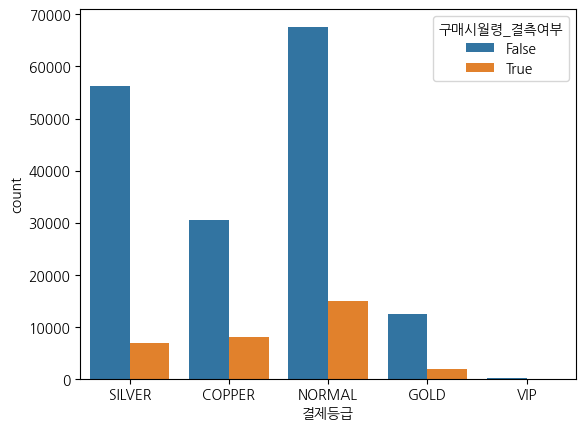

In [164]:
sns.countplot(data=df_clean_final, x="결제등급", hue="구매시월령_결측여부")


31748개의 결측치

✅ 1. 구매시월령_결측여부를 그룹 변수처럼 활용

예:

    결측 vs 비결측 고객의 소비 패턴 비교

    재구매율, 등급 분포, 상품군 선호도 비교

✅ 2. 결측 자체를 의미 있는 “고객 유형”으로 간주

예:

    결측 = 비회원 / 이벤트 고객 / 일회성 소비자일 가능성

    비결측 = 회원가입 / 고정고객 / 충성고객일 가능성

✅ 3. 시각화/모델링 시에는

    구매시월령 → 그대로 쓰되,
    NaN은 처리 가능한 방식으로 예외 관리

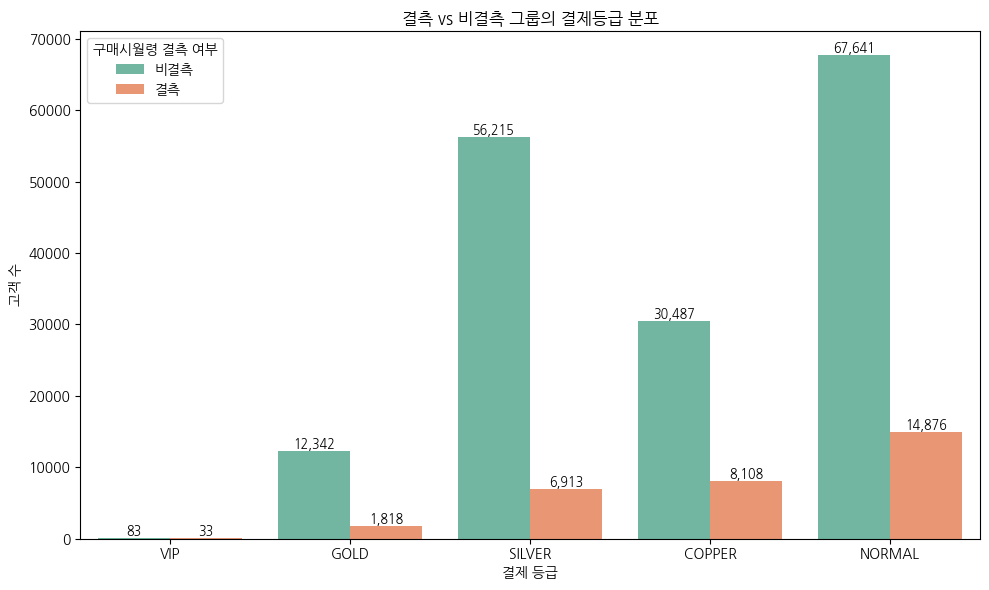

In [168]:
# 결측 vs 비결측 그룹의 "결제등급" 분포 비교
# 결측 그룹이 NORMAL에 몰려 있다면 → 비회원 또는 1회성 고객
# VIP에 결측이 많다면 → 시스템 이슈나 데이터 누락 의심

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_clean_final, x="결제등급", hue="구매시월령_결측여부", order=["VIP", "GOLD", "SILVER", "COPPER", "NORMAL"], palette="Set2")

# 막대 위 수치 표시
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height, f'{int(height):,}', ha='center', va='bottom', fontsize=9)

plt.title("결측 vs 비결측 그룹의 결제등급 분포")
plt.xlabel("결제 등급")
plt.ylabel("고객 수")
plt.legend(title="구매시월령 결측 여부", labels=["비결측", "결측"])
plt.tight_layout()
plt.show()

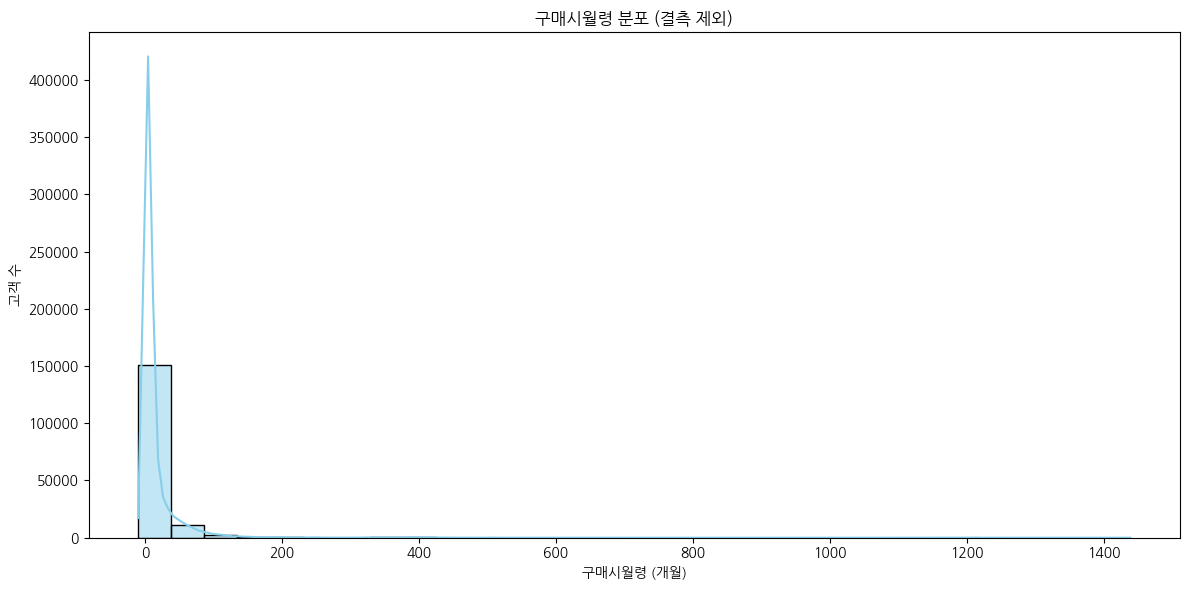

In [169]:
# 구매시월령 분포 자체 시각화 (비결측만)
# 피크가 어디 있는가? → 주요 고객층 나이대 유추 가능
# 이상치(200개월 이상 등)가 있는지 체크도 가능

plt.figure(figsize=(12, 6))
sns.histplot(df_clean_final["구매시월령"].dropna(), bins=30, kde=True, color="skyblue")
plt.title("구매시월령 분포 (결측 제외)")
plt.xlabel("구매시월령 (개월)")
plt.ylabel("고객 수")
plt.tight_layout()
plt.show()